## Plot the training data

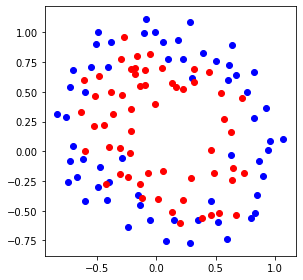

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


## Plot the training error with varying regularization parameters 

In [144]:
degree = 9
iteration = 2000
alpha =0.1
m = label.size
# np.random.seed(777)
# theta = np.random.normal(100)

In [145]:
def high_dimension(x,y,degree):
    basic = np.ones(x.shape[0])
    for i in range(1,degree+1):
        for j in range(0,i+1):
            basic = np.column_stack((basic,(x**(i-j))*(y**j)))
    return basic

In [146]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [147]:
def cost(theta,x,y,reg):
    # data fidelity term
    z = x.dot(theta)
    h = sigmoid(z)
    data_fi_term1 = y * np.log(h)
    data_fi_term2 = (1-y) * np.log(1-h)
    j = -np.sum(data_fi_term1 + data_fi_term2, axis = 0) / m
    
    #data regulization term
    reg_term = (reg * np.sum(theta[1:]**2)) / (2*m)
    j = j + reg_term
    return j

# set reg ramda

In [148]:
x_parameters = high_dimension(pointX,pointY,degree)

In [149]:
y = label

In [150]:
x_parameters.T

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 5.12670000e-02, -9.27420000e-02, -2.13710000e-01, ...,
        -4.84450000e-01, -6.33640000e-03,  6.32650000e-01],
       [ 6.99560000e-01,  6.84940000e-01,  6.92250000e-01, ...,
         9.99270000e-01,  9.99270000e-01, -3.06120000e-02],
       ...,
       [ 2.15501646e-04,  6.08303928e-04,  3.47928848e-03, ...,
         2.33495151e-01,  3.99452474e-05, -1.00825169e-11],
       [ 2.94061154e-03, -4.49258903e-03, -1.12701205e-02, ...,
        -4.81628030e-01, -6.29948983e-03,  4.87862177e-13],
       [ 4.01258940e-02,  3.31797237e-02,  3.65062043e-02, ...,
         9.93449152e-01,  9.93449152e-01, -2.36061598e-14]])

In [151]:
init_theta = np.zeros(x_parameters.shape[1]).reshape(x_parameters.shape[1],1)

In [152]:
def gradient_descent(X,label,theta,iterations,alpha,reg):
    cost_history=[]
    theta_history=[theta]
    accuracy_history=[]
    for i in range(iterations):
        prediction = np.dot(X,theta)
        sig = sigmoid(prediction)
        error = sig- label
        accuracy_history.append(sig)
        cost_history.append(cost(theta,X,label,reg))
        theta = theta - (alpha*(1/m)*np.dot(X.T,error)+(reg / m)*theta)
        theta_history.append(theta)
    return theta_history, cost_history , accuracy_history , reg

In [153]:
theta_history01,cost_history01,accuracy_history01,reg_pa1 = gradient_descent(x_parameters,label,init_theta,iteration,alpha,1)
theta_history02,cost_history02,accuracy_history02,reg_pa2 = gradient_descent(x_parameters,label,init_theta,iteration,alpha,2.2)
theta_history03,cost_history03,accuracy_history03,reg_pa3 = gradient_descent(x_parameters,label,init_theta,iteration,alpha,2.9)

In [143]:
accuracy_history01[10][2].shape

(118,)

In [154]:
cost_history011 = []
cost_history021 = [] 
cost_history031 = [] 
for i in range(iteration):
    cost_history011.append(cost_history01[i][0])
    cost_history021.append(cost_history02[i][0])
    cost_history031.append(cost_history03[i][0])

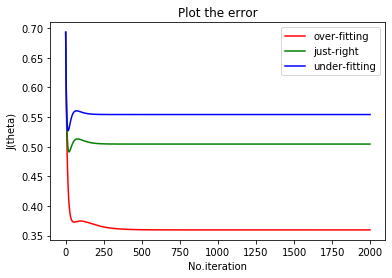

In [155]:
plt.title('Plot the error')
plt.ylabel('J(theta)')
plt.xlabel('No.iteration')
plt.plot(cost_history011,c='r',label='over-fitting')
plt.plot(cost_history021,c='g',label='just-right')
plt.plot(cost_history031,c='b',label='under-fitting')
plt.legend()
plt.show()

In [122]:
def prGreen(prt): print("\033[92m {}\033[00m".format(prt))
def prRed(prt): print("\033[31m {}\033[00m".format(prt))
def prBlue(prt): print("\033[94m {}\033[00m".format(prt))

In [123]:
print("lambda01 :")
prRed(reg_pa1)
print("lambda02 :")
prGreen(reg_pa2)
print("lambda03 :")
prBlue(reg_pa3)

lambda01 :
 1
lambda02 :
 2.2
lambda03 :
 2.9


In [129]:
accuracy_history011 =[]
accuracy_history021 =[]
accuracy_history031 =[]
for i in range(iteration):
    accuracy_history011.append(cost_history01[i][0])
    accuracy_history021.append(cost_history02[i][0])
    accuracy_history031.append(cost_history03[i][0])


correct_history =[]
for i in range(iteration):
    correct = 0
    if(((accuracy_history011[i] <= 0.5) and (label[i] == 1)) or ((accuracy_history011[i] > 0.5) and (label[i] == 0))):
        correct += 1
        correct_history.append(correct)        

for i in range(iteration):
     correct_history011[i] = (correct_history[i] / len(accuracy_history011[0])) * 100


IndexError: invalid index to scalar variable.

In [128]:
len(accuracy_history011)

2000